In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
print(tf.__version__)

1.13.1


In [37]:
fashion_mnist = keras.datasets.fashion_mnist

In [39]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Cost', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
train_images.shape

(60000, 28, 28)

In [42]:
len(train_labels)

60000

In [43]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [44]:
test_images.shape

(10000, 28, 28)

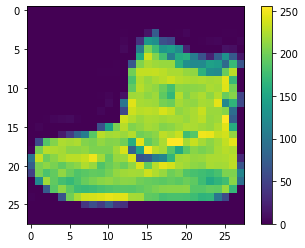

In [45]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
train_images = train_images / 255.0

test_images = test_images / 255.0

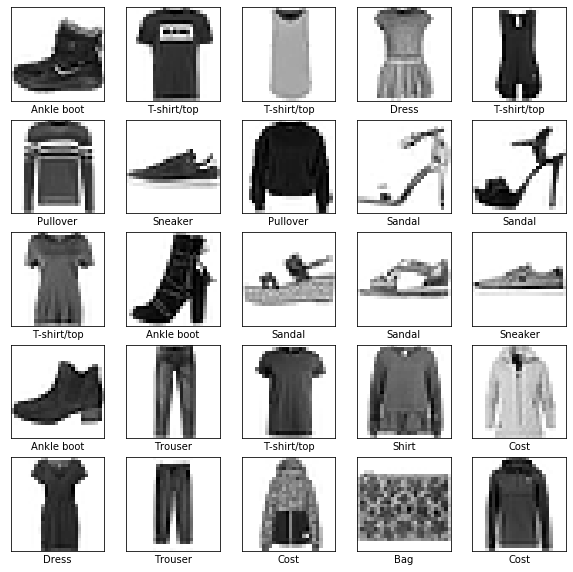

In [47]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [49]:
model = keras.Sequential([
	keras.layers.Flatten(input_shape=(28, 28)),  #Transforms the image from a 2D array of 28x28 to a 1D array of 784 pixels
	keras.layers.Dense(128, activation=tf.nn.relu),  # 128 neurons
	keras.layers.Dense(10, activation=tf.nn.softmax) #10 neurons and a softmax layer and returns an array of 10 probability scores
])

In [50]:
model.compile(optimizer = 'adam',
			  loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [51]:
#Fit the model to the training data
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4962 - acc: 0.8265
Epoch 2/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3760 - acc: 0.8637
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3376 - acc: 0.8766
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3132 - acc: 0.8864
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2959 - acc: 0.8915
Epoch 6/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2819 - acc: 0.8956
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2678 - acc: 0.9006
Epoch 8/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2569 - acc: 0.9048
Epoch 9/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2463 - acc: 0.9074
Epoch 10/10
60000/60000 [==============================] - 6s 96us/sample - los

In [52]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 141us/sample - loss: 0.3283 - acc: 0.8859
Test accuracy: 0.8859


In [53]:
predictions = model.predict(test_images)

In [55]:
predictions[0]

array([1.0893432e-08, 9.6391970e-13, 6.1948269e-09, 2.4021643e-10,
       3.3603029e-10, 5.9642748e-04, 3.0608527e-09, 5.1204753e-03,
       6.5919849e-08, 9.9428296e-01], dtype=float32)

In [58]:
np.argmax(predictions[0])

9

In [59]:
test_labels[0]

9

In [63]:
def plot_image(i, predictions_array, true_label, img):
	predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img, cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)
			

def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#777777")
	plt.ylim([0, 1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('green')

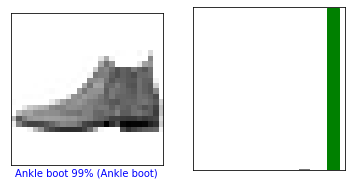

In [68]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

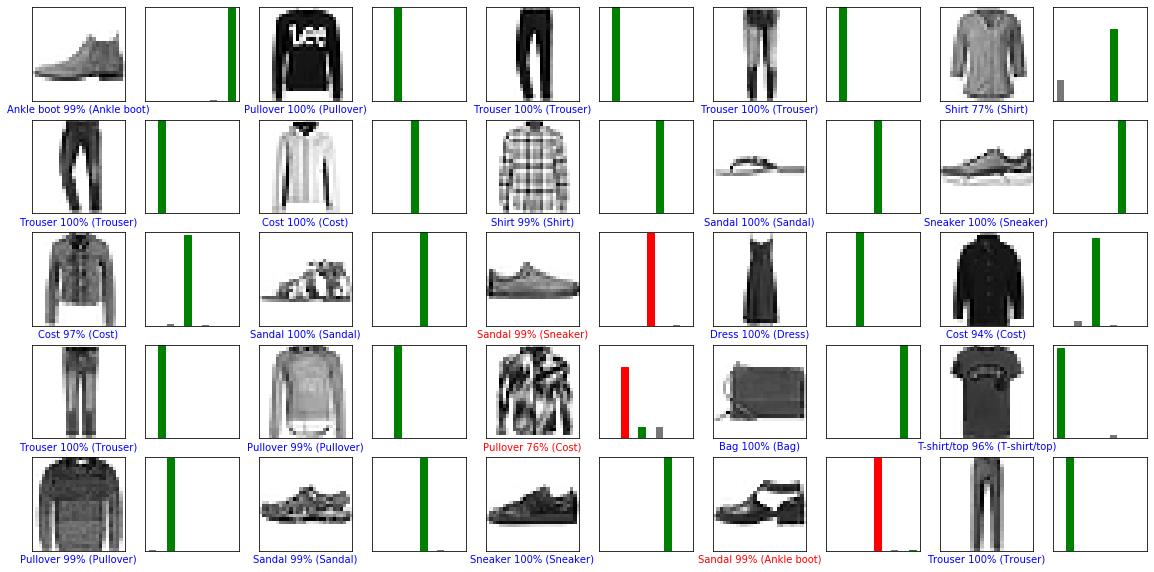

In [69]:
num_rows = 5
num_columns = 5
num_images = num_rows*num_columns
plt.figure(figsize=(2*2*num_columns, 2*num_rows))
for i in range(num_images):
	plt.subplot(num_rows, 2*num_columns, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(num_rows, 2*num_columns, 2*i+2)
	plot_value_array(i, predictions, test_labels)
plt.show()

In [70]:
img = test_images[0]
print(img.shape)

(28, 28)


In [71]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [72]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.0893473e-08 9.6392154e-13 6.1948500e-09 2.4021596e-10 3.3603029e-10
  5.9642922e-04 3.0608645e-09 5.1204874e-03 6.5919977e-08 9.9428296e-01]]


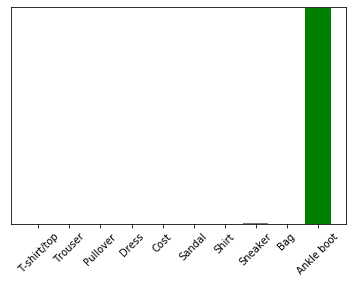

In [75]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [76]:
np.argmax(predictions_single[0])

9